<a href="https://colab.research.google.com/github/keunjaeLee/keunjaeLee/blob/main/Automotive_Security_Reverse_Engenering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automotive Security
CAN Traffic Analysis

### DATA LOAD

Dataset Download

고속도로 주행 중인 차량에서 수집된 CAN 데이터셋 (약 10분)

In [ ]:
!pip install gdown
!gdown --id 1tX_BYuIaiXtGBpl_waDGcV4aevUfbCug --output Car_Dataset.csv

# https://drive.google.com/file/d/197EhIqL83N8WkWTFrkeLbc46LHZZJsXx/view?usp=sharing
# https://drive.google.com/file/d/1hseXEAs1xeqhoiR-k0cUqSg3hogCFtpQ/view?usp=sharing
# https://drive.google.com/file/d/1tX_BYuIaiXtGBpl_waDGcV4aevUfbCug/view?usp=sharing

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1tX_BYuIaiXtGBpl_waDGcV4aevUfbCug
To: /content/Car_Dataset.csv
100% 51.6M/51.6M [00:00<00:00, 88.6MB/s]


## OBD-II 포트를 통한 자동차 내부 네트워크 (CAN Bus) 연결

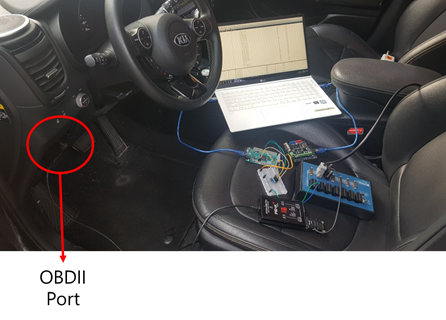


In [ ]:
import pandas as pd

df = pd.read_csv('./Car_Dataset.csv')
# Timestamp, Arbitration_ID, DLC, Data

print(df.shape)
print(df.head())

(1054015, 5)
   Timestamp Arbitration_ID  DLC                     Data   Class
0   0.795437            260    8  54 AC B0 B0 00 DB 63 55  Normal
1   0.795669            251    8  70 03 08 6F 00 8E E7 7F  Normal
2   0.795899            329    8  0F BA 7D 14 11 C7 73 21  Normal
3   0.796144            340    8  04 00 00 24 34 00 6C 10  Normal
4   0.796380            140    8  E9 86 00 68 20 00 02 F4  Normal


### CAN ID 식별

In [ ]:
# The number of distinct CAN IDs
num_ID = len(set(df['Arbitration_ID'].values))

# List of CAN IDs
list_ID = list(set(df['Arbitration_ID'].values)) # set 함수를 이용하여 중복 제거

print('The number of distinct CAN IDs:',num_ID)
list_ID.sort()
# print(list_ID)
for idx, val in enumerate(list_ID):
  ID = list_ID[idx]
  print('CAN ID: '+ID+' / DLC: ',df.at[df.loc[df['Arbitration_ID']==ID].index[0],'DLC'])



The number of distinct CAN IDs: 68
CAN ID: 130 / DLC:  8
CAN ID: 140 / DLC:  8
CAN ID: 153 / DLC:  8
CAN ID: 164 / DLC:  4
CAN ID: 166 / DLC:  6
CAN ID: 167 / DLC:  8
CAN ID: 220 / DLC:  8
CAN ID: 222 / DLC:  8
CAN ID: 223 / DLC:  8
CAN ID: 224 / DLC:  8
CAN ID: 225 / DLC:  8
CAN ID: 226 / DLC:  8
CAN ID: 251 / DLC:  8
CAN ID: 260 / DLC:  8
CAN ID: 2B0 / DLC:  5
CAN ID: 329 / DLC:  8
CAN ID: 340 / DLC:  8
CAN ID: 356 / DLC:  7
CAN ID: 366 / DLC:  7
CAN ID: 367 / DLC:  8
CAN ID: 368 / DLC:  8
CAN ID: 381 / DLC:  8
CAN ID: 386 / DLC:  8
CAN ID: 387 / DLC:  8
CAN ID: 394 / DLC:  8
CAN ID: 410 / DLC:  8
CAN ID: 420 / DLC:  8
CAN ID: 421 / DLC:  8
CAN ID: 428 / DLC:  8
CAN ID: 43 / DLC:  8
CAN ID: 436 / DLC:  4
CAN ID: 44 / DLC:  8
CAN ID: 453 / DLC:  5
CAN ID: 470 / DLC:  8
CAN ID: 47F / DLC:  6
CAN ID: 484 / DLC:  8
CAN ID: 485 / DLC:  4
CAN ID: 48A / DLC:  4
CAN ID: 490 / DLC:  7
CAN ID: 492 / DLC:  8
CAN ID: 495 / DLC:  8
CAN ID: 4A0 / DLC:  8
CAN ID: 4F1 / DLC:  4
CAN ID: 500 / DLC:  1

### 주기 / 비주기 메시지 확인


1.   Periodic Msg
2.   On-Event Msg
3.   Periodic-and-On-Event Msg

In [ ]:
import matplotlib.pyplot as plt

def show_fig_time_interval(CAN_ID):
  previous_timestamp = 0
  interval_list_y = []
  interval_list_x = []
  num = 0
  for index, msg in df.iterrows():
    if msg['Arbitration_ID'] == CAN_ID:
      interval = (msg['Timestamp'] - previous_timestamp)*1000 # s -> ms
      previous_timestamp = msg['Timestamp']
      interval_list_y.append(interval)
      interval_list_x.append(msg['Timestamp']*1000)
      num += 1
  interval_list_y   = interval_list_y[1:]
  interval_list_x   = interval_list_x[1:]
  min_interval    = min(interval_list_y)
  max_interval    = max(interval_list_y)
  mean_interval   = sum(interval_list_y)/len(interval_list_y)

  print("The number of CAN Msgs:", num)
  print("Minimum interval (ms): ", min_interval)
  print("Maximum interval (ms): ", max_interval)
  print("Mean interval (ms): ", round(mean_interval,0))
  plt.plot(interval_list_x, interval_list_y, '.')

  plt.plot(interval_list_x,[mean_interval for i in interval_list_x], 'r--', markersize = 2)
  # plt.plot([min_interval for i in interval_list_x], 'r-', markersize = 2)
  # plt.plot([max_interval for i in interval_list_x], 'r-', markersize = 2)
  plt.ylabel("Freq (ms)")
  plt.xlabel("Elapsed time (ms)")
  plt.title('Time Intervals\n CAN ID: ' + CAN_ID)
  plt.rcParams["figure.figsize"] = (30,10)
  plt.show()

  return interval_list_y




* Periodic Message Example

The number of CAN Msgs: 42772
Minimum interval (ms):  9.545375000016065
Maximum interval (ms):  10.325149999999894
Mean interval (ms):  10.0


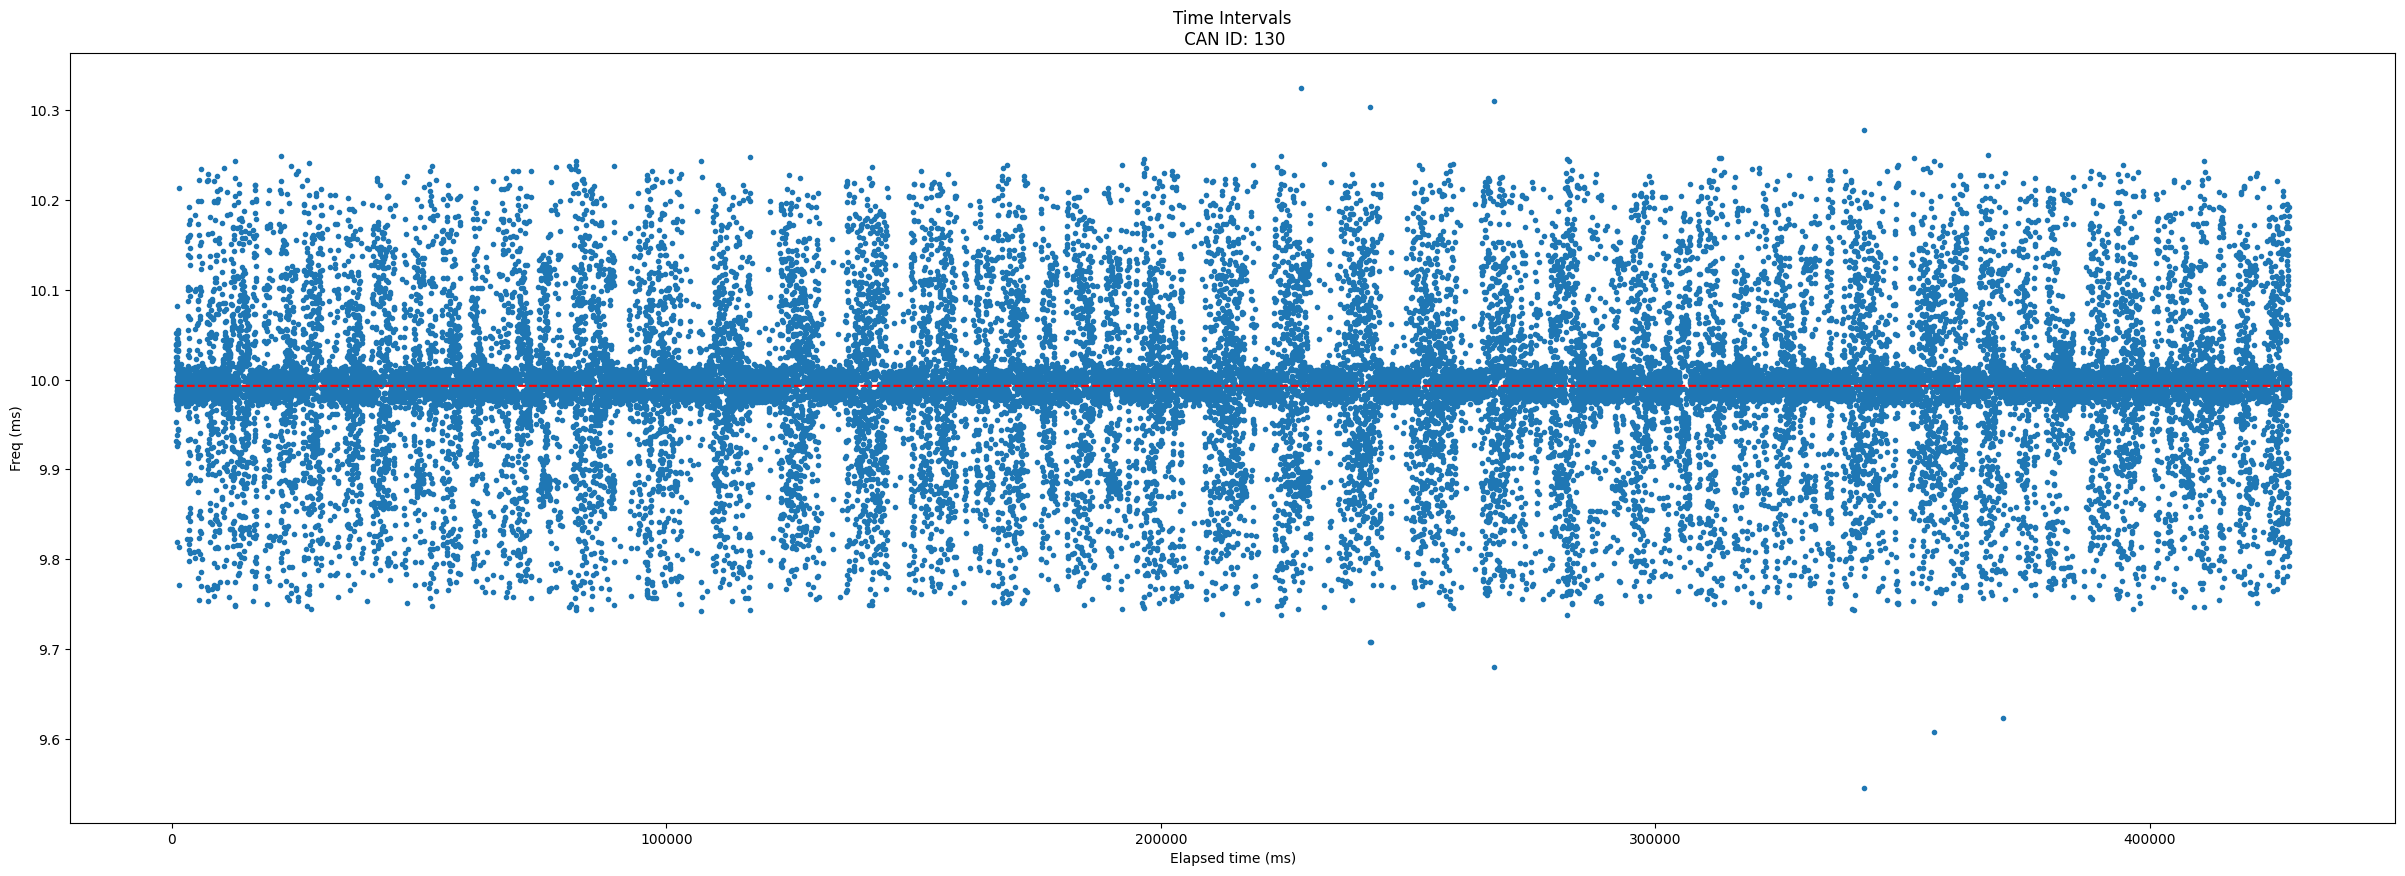

In [ ]:
CAN_ID = '130'
intervals = show_fig_time_interval(CAN_ID)

* On-Event Message Example

The number of CAN Msgs: 42
Minimum interval (ms):  39.741324999994276
Maximum interval (ms):  109921.146925
Mean interval (ms):  4871.0


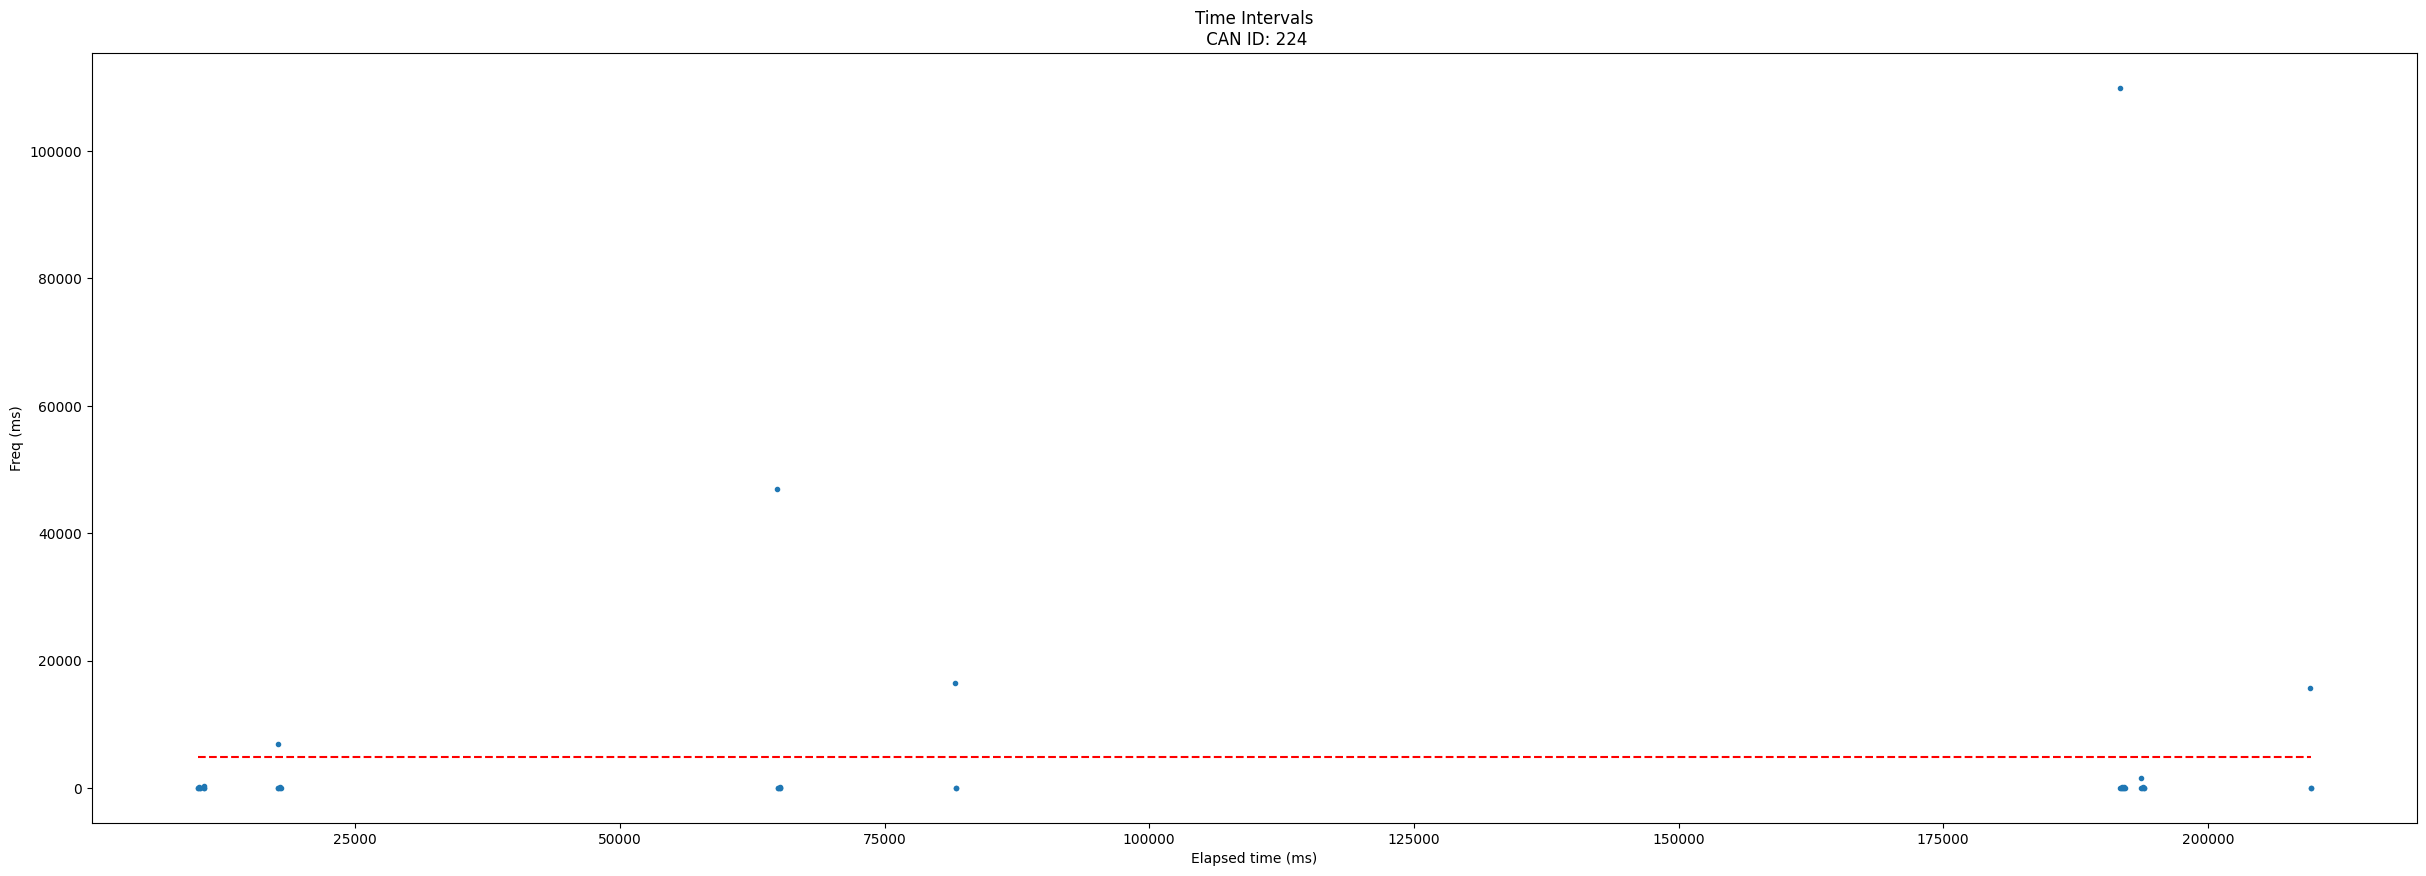

In [ ]:
CAN_ID = '224'
intervals = show_fig_time_interval(CAN_ID)

* Periodic-and-on-Event (PE) Message Example

The number of CAN Msgs: 4302
Minimum interval (ms):  9.819375000001074
Maximum interval (ms):  104.157100000009
Mean interval (ms):  99.0


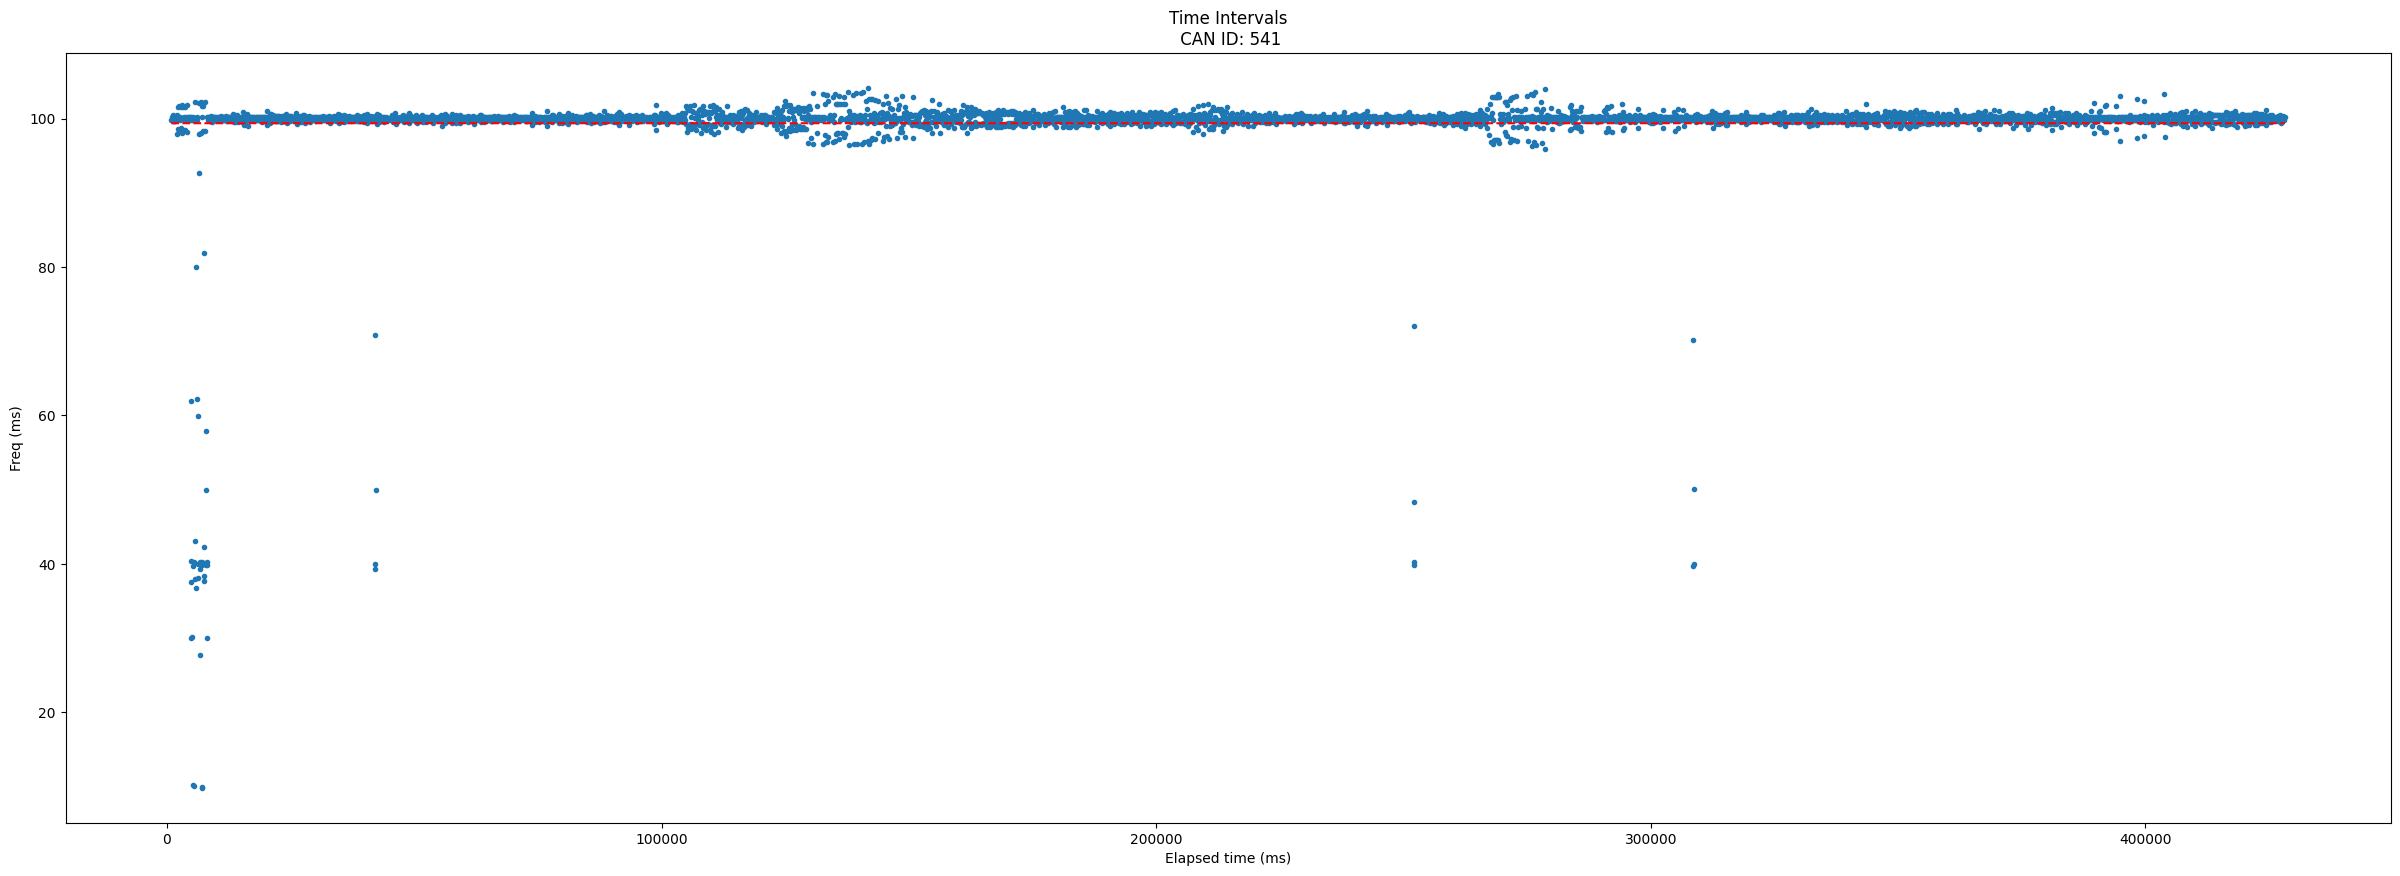

In [ ]:
CAN_ID = '541'
intervasl = show_fig_time_interval(CAN_ID)
# for x in intervals:
#   print(x)



*   Periodic / On-Event / Periodic-and-on-Event 분류




In [ ]:
def classity_Transmission_Type(CAN_ID):
  print(CAN_ID)
  previous_timestamp = 0
  previous_interval = 0
  interval_list = []
  for index, msg in df.iterrows():
    if msg['Arbitration_ID'] == CAN_ID:
      interval = (msg['Timestamp'] - previous_timestamp)*1000 # s -> ms
      previous_timestamp = msg['Timestamp']
      interval_list.append(interval)

  interval_list   = interval_list[1:]
  # mean_interval = sum(interval_list)/len(interval_list)
  maxDeviation = 10

  notP = False
  privious_mean_interval = 0
  previous_interval = 0

  for idx, cur_interval in enumerate(interval_list):
    cur_mean_interval = (privious_mean_interval*idx+cur_interval)/(idx+1)
    if (idx == 0):
      previous_interval = cur_interval
      privious_mean_interval = cur_interval
      continue

    if  (cur_interval > previous_interval*2) and (cur_mean_interval > (privious_mean_interval + maxDeviation) ):# Event type
      # print('previous_interval: ', previous_interval)
      # print('cur_interval: ', cur_interval)
      # print('cur_mean_interval: ',cur_mean_interval)
      # print('privious_mean_interval: ',privious_mean_interval)
      print("Transmission type: E")
      notP = True
      break

    if ( (cur_interval < cur_mean_interval - maxDeviation) and (cur_mean_interval < privious_mean_interval) ): # PE type
      if (idx < (len(interval_list) - 2) ):
        next_interval = interval_list[idx+1]
        next_next_interval = interval_list[idx+2]
        if ( (next_interval < privious_mean_interval - maxDeviation) and (next_next_interval < privious_mean_interval - maxDeviation) ):  # PE type
          # print('previous_interval: ',previous_interval)
          # print('cur_interval: ',cur_interval)
          # print('next_interval: ',next_interval)
          # print('next_next_interval: ',next_next_interval)

          print("Transmission type: PE")
          notP = True
          break
      else:
        print("Insufficient Log")
        break

    privious_mean_interval = cur_mean_interval
    previous_interval = cur_interval

  if (notP == False):
    print("Transmission type: P")


*   Example

In [ ]:
CAN_ID = '130'
classity_Transmission_Type(CAN_ID)

CAN_ID = '224'
classity_Transmission_Type(CAN_ID)

CAN_ID = '541'
classity_Transmission_Type(CAN_ID)

130
Transmission type: P
224
previous_interval:  39.94847500000098
cur_interval:  120.02314999999975
cur_mean_interval:  66.60965833333303
privious_mean_interval:  39.902912499999665
Transmission type: E
541
previous_interval:  100.2466249999996
cur_interval:  61.87727499999962
next_interval:  30.02227500000032
next_next_interval:  40.387849999999226
Transmission type: PE


* Periodic / On-Event / Periodic-and-On-Event 분류 결과
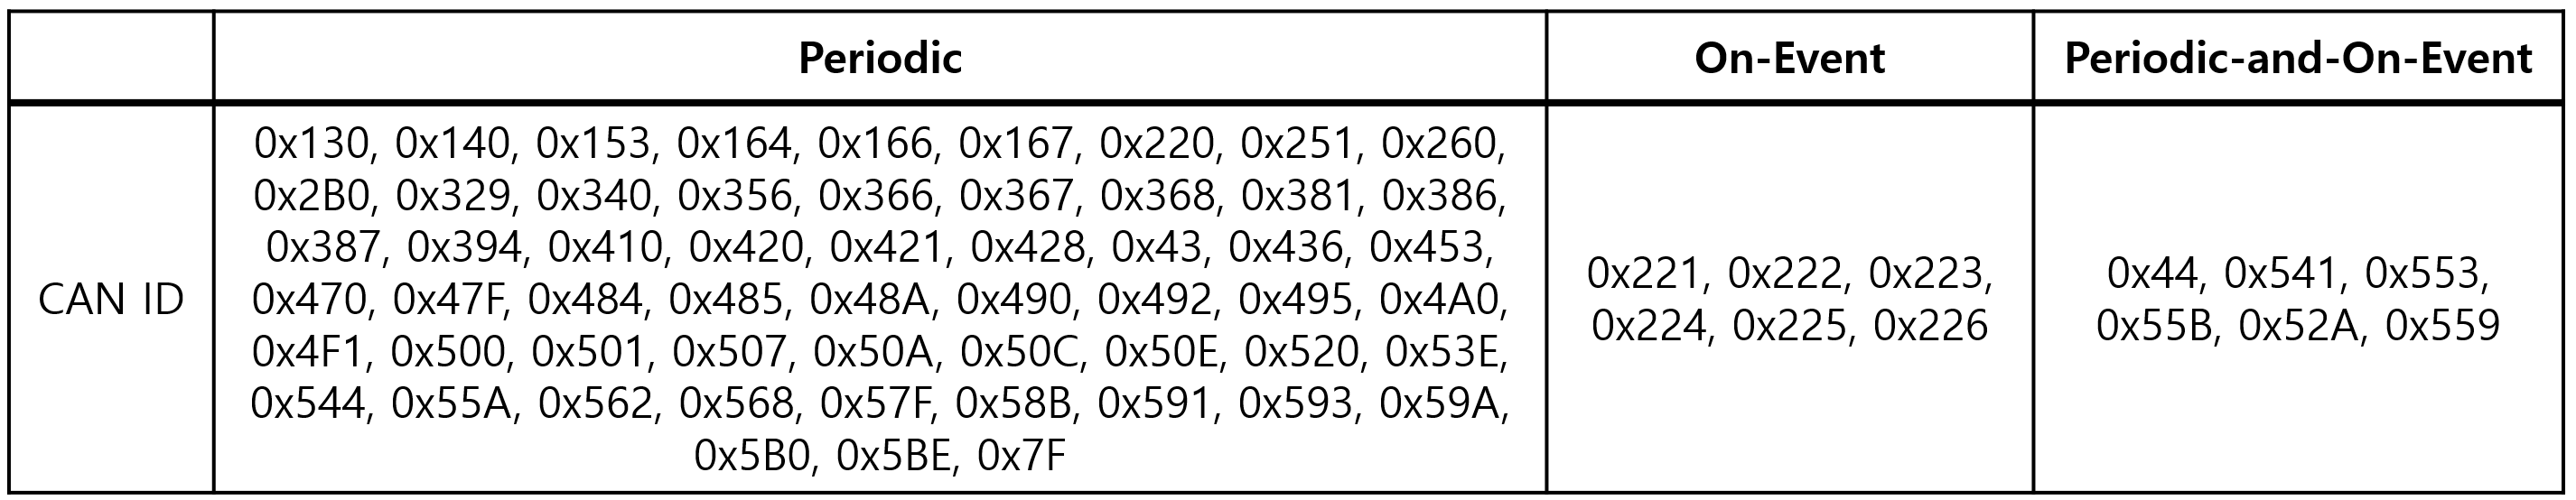



*   CAN ID / DLC / Transmission Type 분류
1. Idling.csv
2. Driving.csv







### Network Mapping

주어진 dataset에서 2개의 target ID를 설정하면, 해당ID를 갖는 메시지들간의 시간 간격을 return 해주는 함수

비주기 메시지의 경우에는 Network Mapping이 어려움


### Case #1

동일한 주기를 갖는 2개의 메시지가 같은 ECU에서 주기적으로 전송되는 **경우**



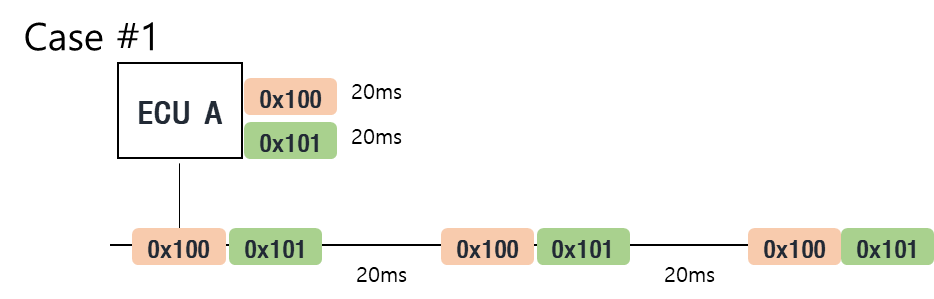


0.24999999999408828
0.24999999999408828


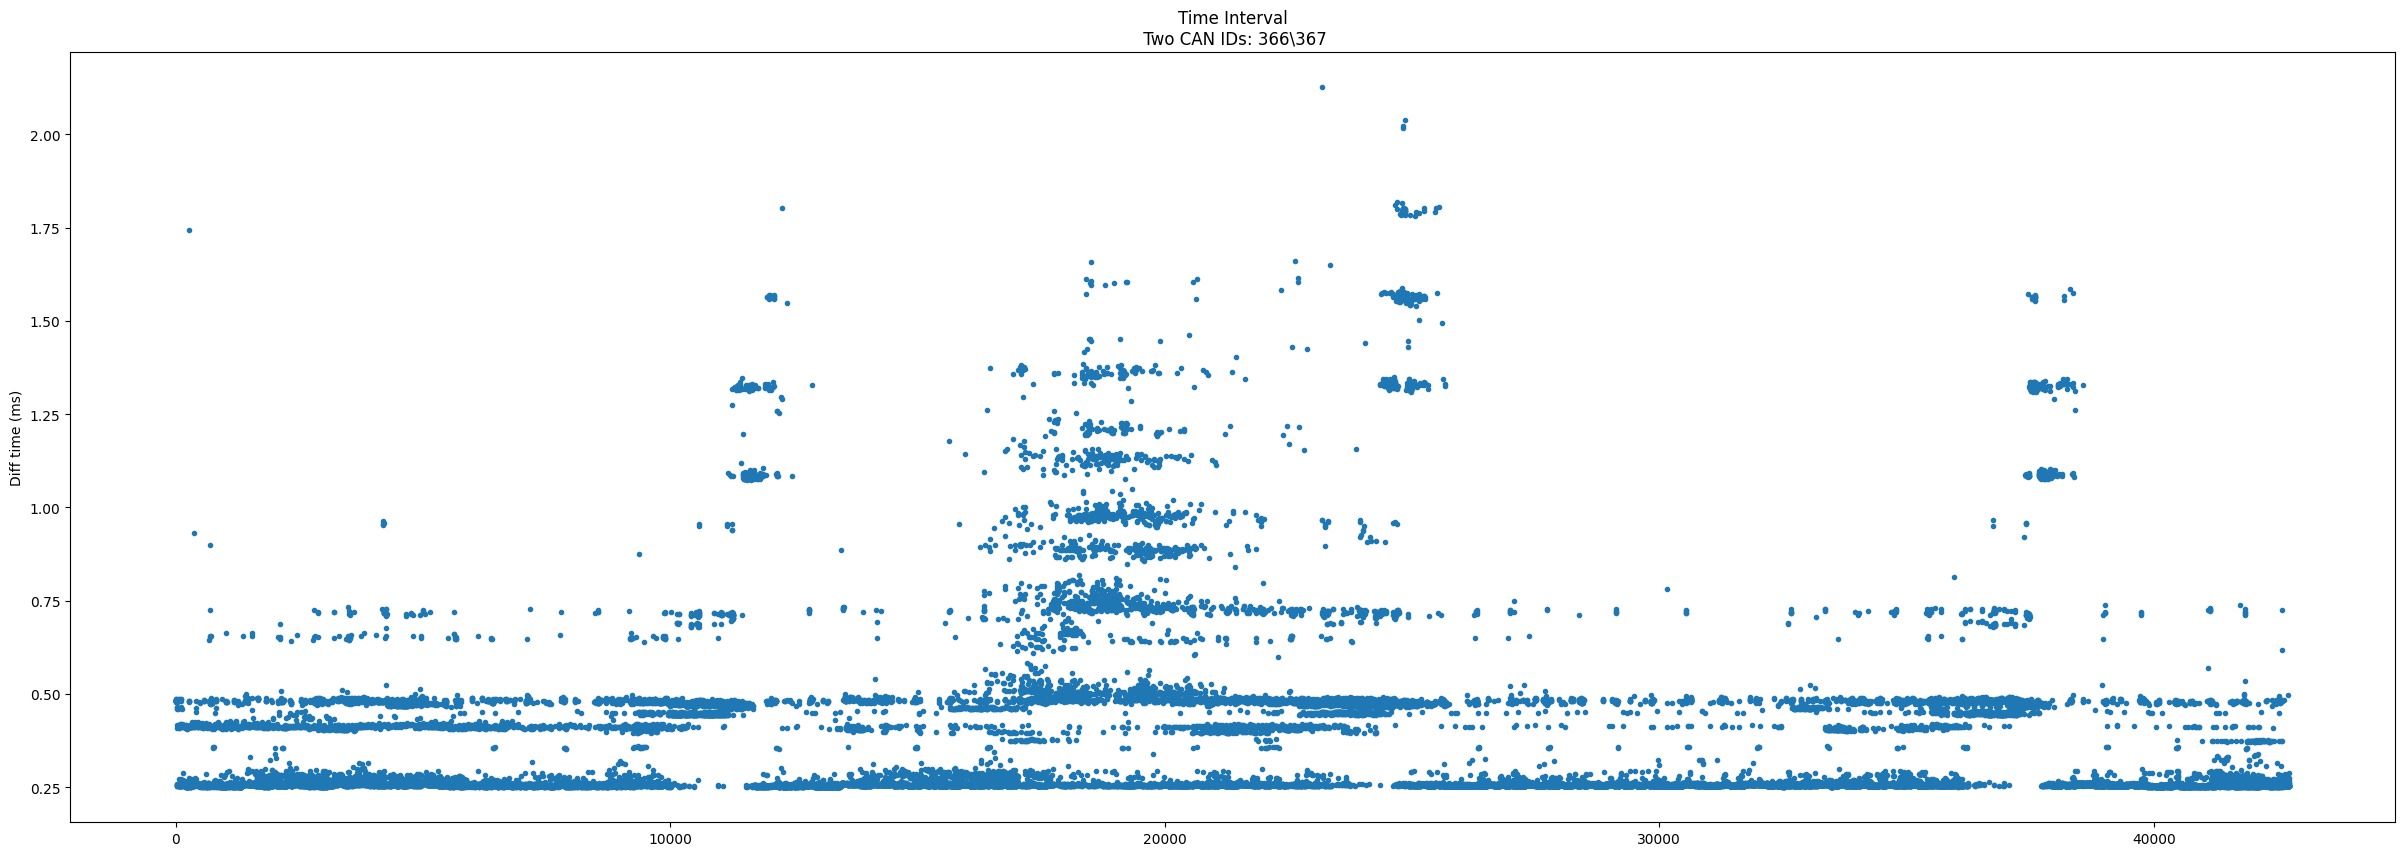

In [ ]:
import matplotlib.pyplot as plt

CAN_ID_A = "366"
CAN_ID_B = "367"

find_Row_A = df.loc[df['Arbitration_ID']==CAN_ID_A]
find_Row_B = df.loc[df['Arbitration_ID']==CAN_ID_B]

interval_list = []
for pair in zip(find_Row_A['Timestamp'], find_Row_B['Timestamp']):
  interval_list.append((pair[1] - pair[0])*1000 if pair[1] - pair[0]>0 else (pair[0] - pair[1])*1000)

interval_list = interval_list[1:]
min_interval = min(interval_list)
max_interval = max(interval_list)
print('min_interval: ',min_interval)
print('max_interval: ',max_interval)

plt.plot(interval_list, '.')
plt.ylabel("Diff time (ms)")
plt.title('Time Interval\n Two CAN IDs: ' + CAN_ID_A + '\\' + CAN_ID_B)
# plt.ylim([0,0.01])
plt.show()

### Case #2

동일한 주기를 갖는 2개의 메시지가 같은 ECU에서 주기적으로 전송되는 경우

(2개의 메시지가 서로 다른 타이밍에 전송됨)

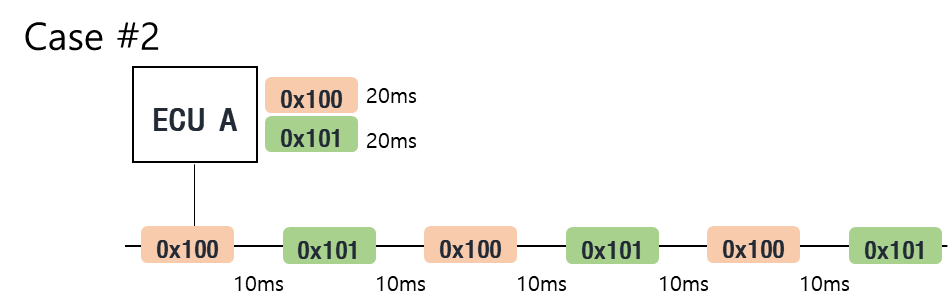

min_interval:  8.571125000003121
max_interval:  11.159024999926714


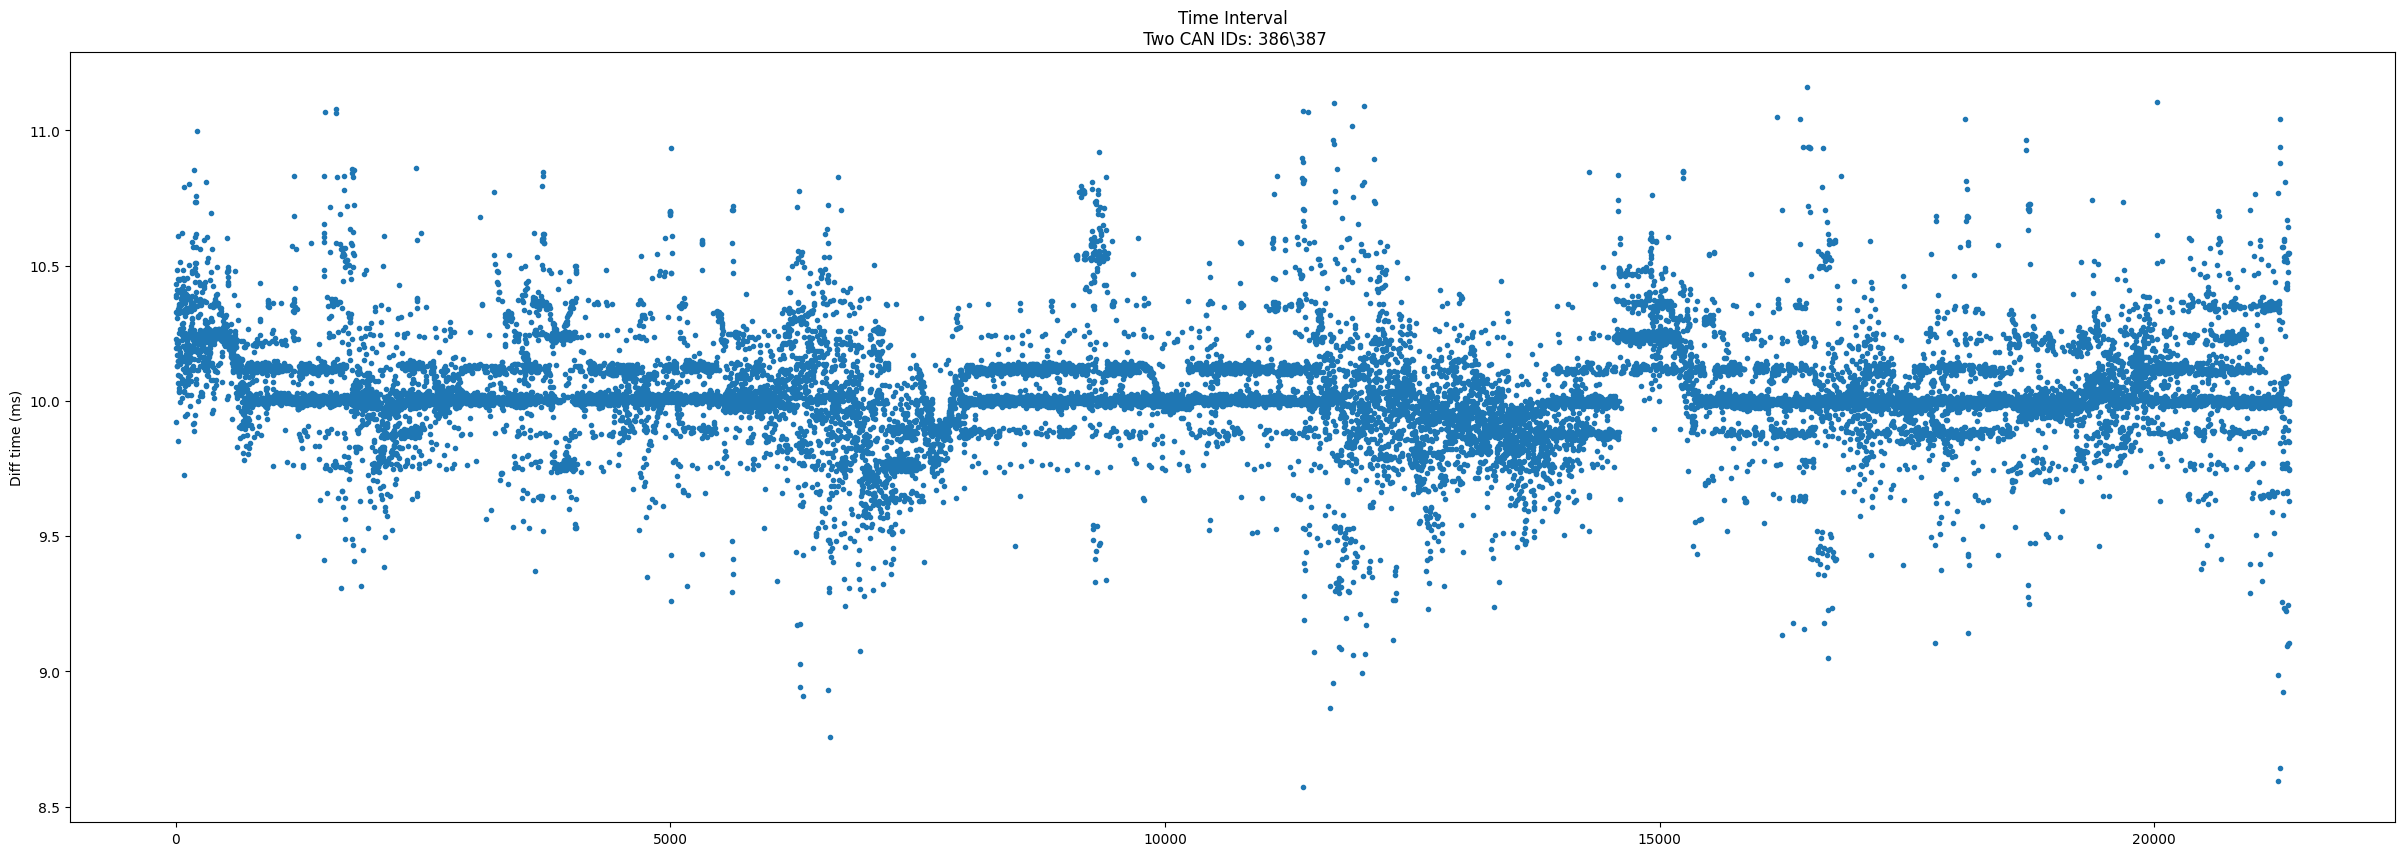

In [ ]:
import matplotlib.pyplot as plt

CAN_ID_A = "386"
CAN_ID_B = "387"

find_Row_A = df.loc[df['Arbitration_ID']==CAN_ID_A]
find_Row_B = df.loc[df['Arbitration_ID']==CAN_ID_B]

interval_list = []
for pair in zip(find_Row_A['Timestamp'], find_Row_B['Timestamp']):
  interval_list.append((pair[1] - pair[0])*1000 if pair[1] - pair[0]>0 else (pair[0] - pair[1])*1000)

interval_list = interval_list[1:]
min_interval = min(interval_list)
max_interval = max(interval_list)
print('min_interval: ',min_interval)
print('max_interval: ',max_interval)

plt.plot(interval_list, '.')
plt.ylabel("Diff time (ms)")
plt.title('Time Interval\n Two CAN IDs: ' + CAN_ID_A + '\\' + CAN_ID_B)
# plt.ylim([0.005,0.015])
plt.show()

### Case #3

주기가 다른 2개의 메시지가 같은 ECU에서 주기적으로 전송되는 경우


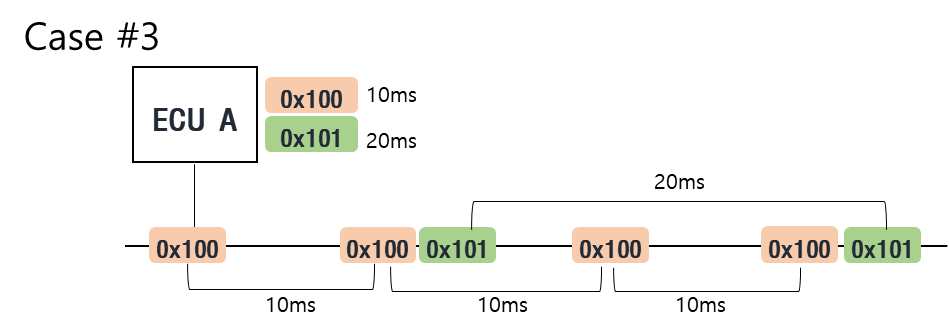

min_interval:  8.22279999999953
max_interval:  19.540300000000954


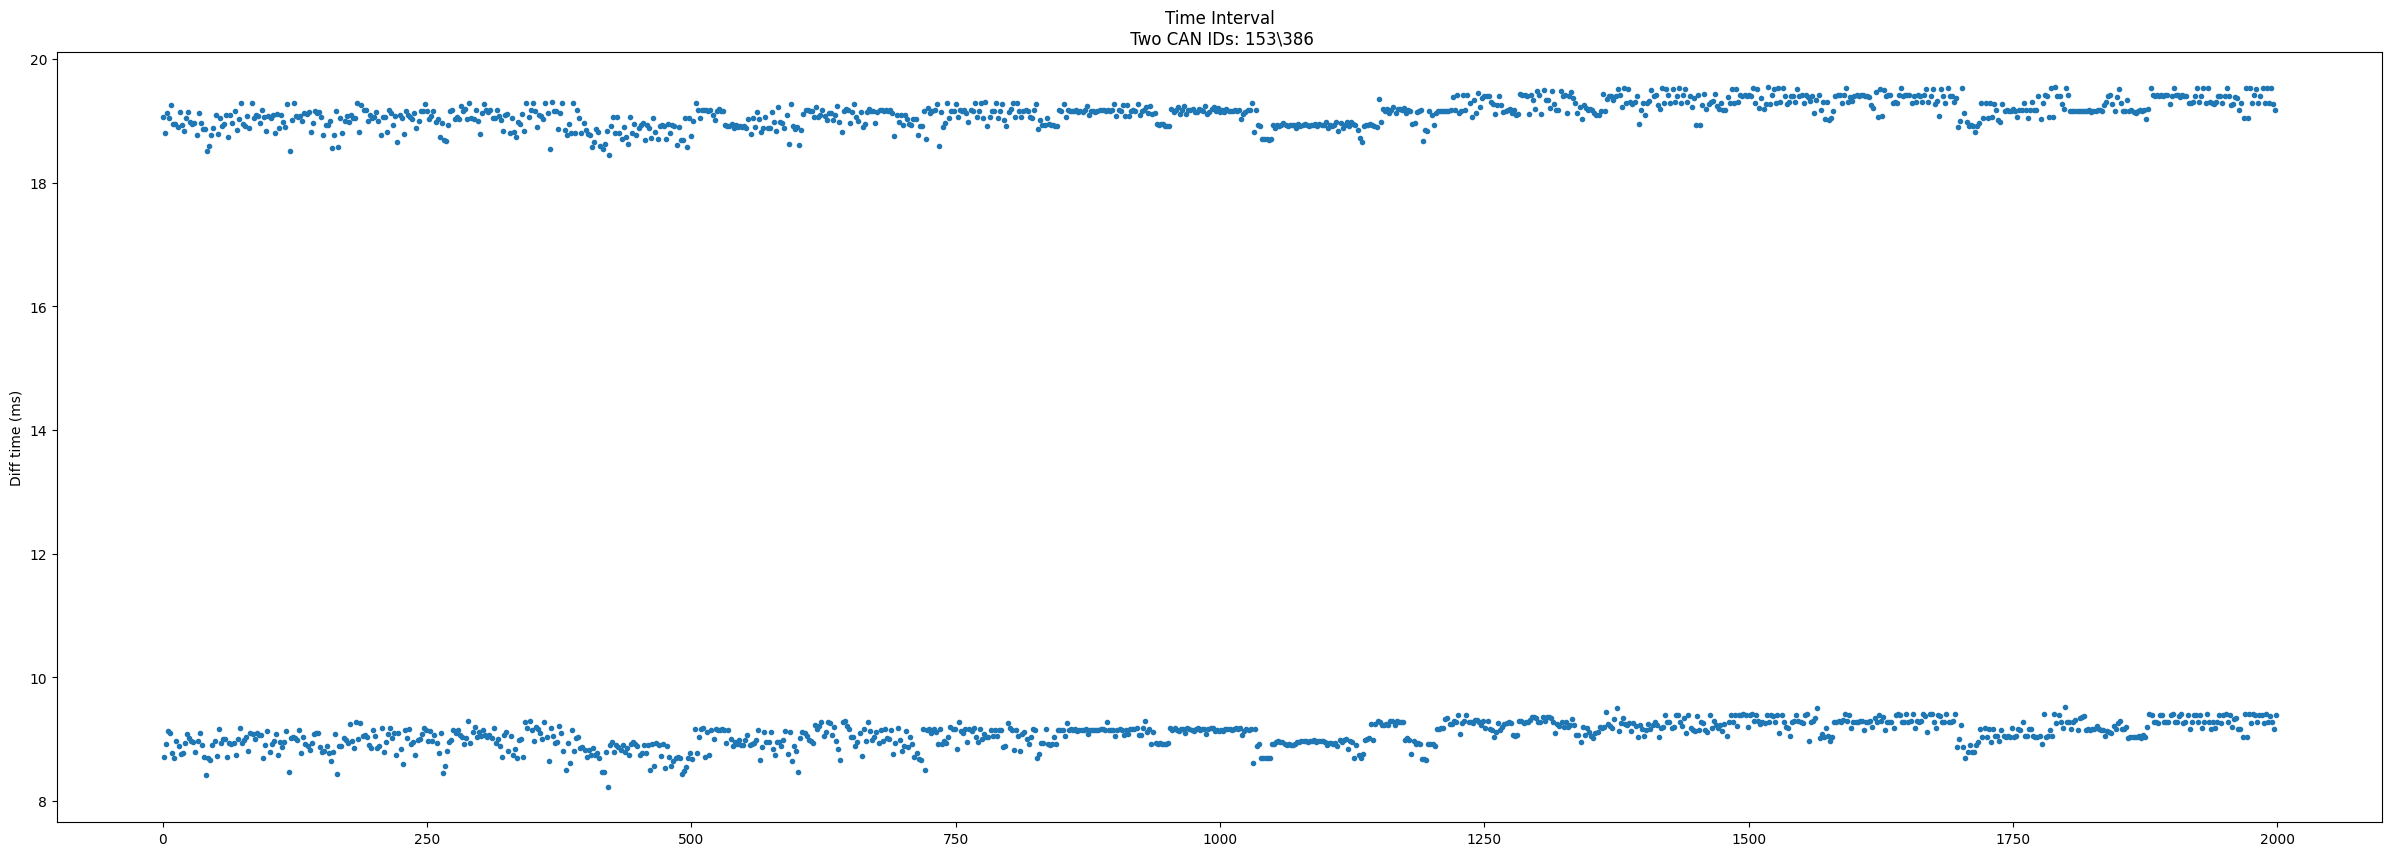

In [ ]:
CAN_ID_A = "153"
CAN_ID_B = "386"


find_Row_A = df.loc[df['Arbitration_ID']==CAN_ID_A]
find_Row_B = df.loc[df['Arbitration_ID']==CAN_ID_B]

interval_list = []
num = 0

if len(find_Row_A) > len(find_Row_B):

    for index, msg in find_Row_A.iterrows():
        time = msg['Timestamp']
        if len(find_Row_B.index[find_Row_B['Timestamp'] <= time]) != 0 :
            interval = time - find_Row_B.loc[find_Row_B.index[find_Row_B['Timestamp'] <= time][-1]]['Timestamp']
            interval_list.append(interval*1000)
            num += 1
            if num > 2000:
                break

else:
    for index, msg in find_Row_B.iterrows():
        time = msg['Timestamp']
        if len(find_Row_A.index[find_Row_A['Timestamp'] <= time]) != 0 :
            interval = time - find_Row_A.loc[find_Row_A.index[find_Row_A['Timestamp'] <= time][-1]]['Timestamp']
            interval_list.append(interval*1000)
            num += 1
            if num > 2000:
                break

interval_list = interval_list[1:]
min_interval = min(interval_list)
max_interval = max(interval_list)
print('min_interval: ',min_interval)
print('max_interval: ',max_interval)

plt.plot(interval_list, '.')
plt.ylabel("Diff time (ms)")
plt.title('Time Interval\n Two CAN IDs: ' + CAN_ID_A + '\\' + CAN_ID_B)
plt.show()

Case #4

동일한 주기를 갖는 2개의 메시지가 서로 다른 ECU에서 주기적으로 전송되는 경우

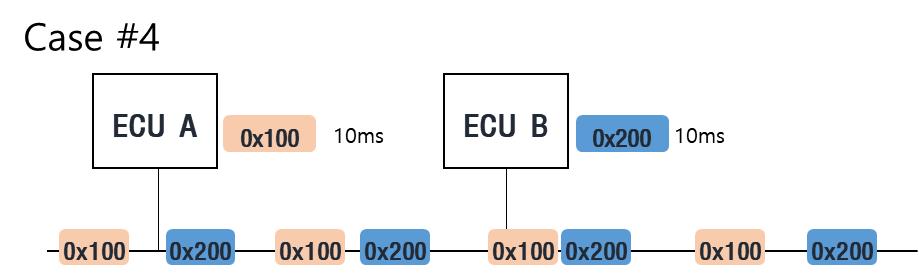

min_interval:  0.23585000000014844
max_interval:  11.643700000000479


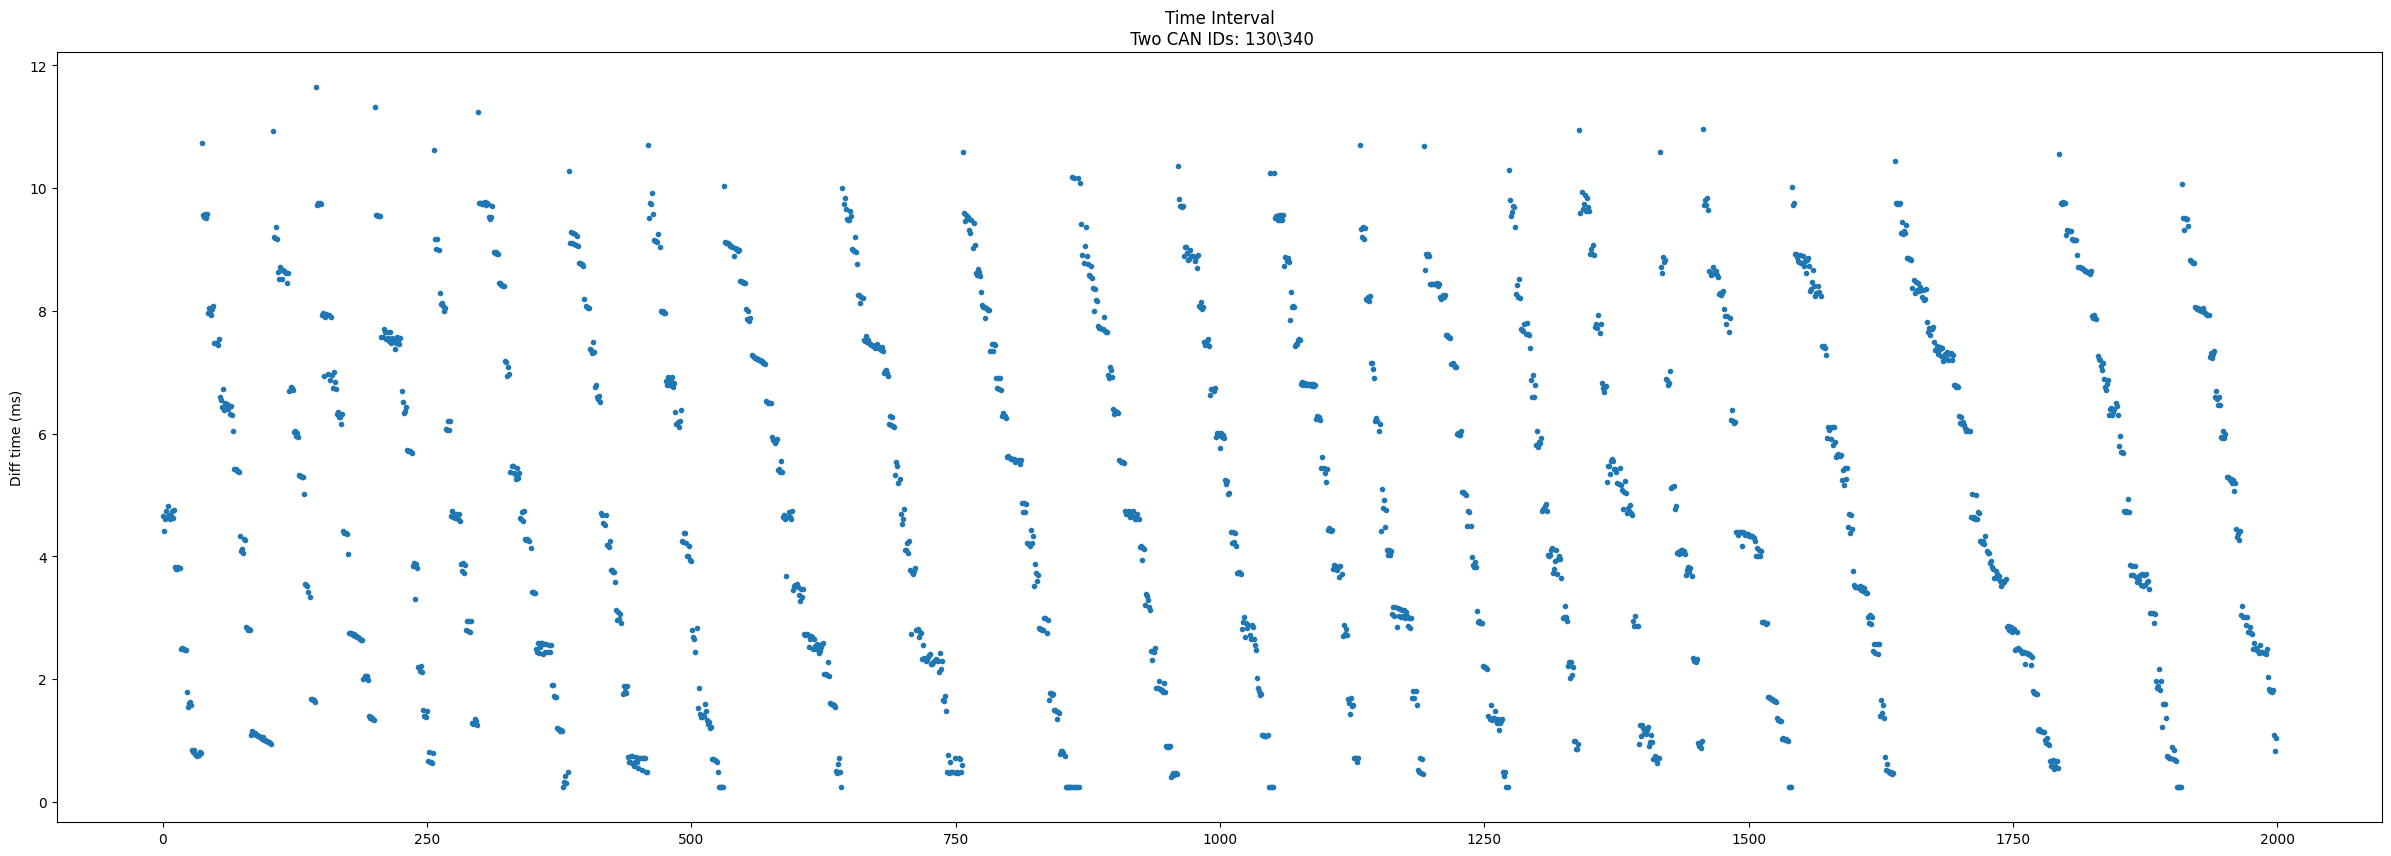

In [ ]:
CAN_ID_A = "130"
CAN_ID_B = "340"


find_Row_A = df.loc[df['Arbitration_ID']==CAN_ID_A]
find_Row_B = df.loc[df['Arbitration_ID']==CAN_ID_B]

interval_list = []
num = 0

if len(find_Row_A) > len(find_Row_B):

    for index, msg in find_Row_A.iterrows():
        time = msg['Timestamp']
        if len(find_Row_B.index[find_Row_B['Timestamp'] <= time]) != 0 :
            interval = time - find_Row_B.loc[find_Row_B.index[find_Row_B['Timestamp'] <= time][-1]]['Timestamp']
            interval_list.append(interval*1000)
            num += 1
            if num > 2000:
                break

else:
    for index, msg in find_Row_B.iterrows():
        time = msg['Timestamp']
        if len(find_Row_A.index[find_Row_A['Timestamp'] <= time]) != 0 :
            interval = time - find_Row_A.loc[find_Row_A.index[find_Row_A['Timestamp'] <= time][-1]]['Timestamp']
            interval_list.append(interval*1000)
            num += 1
            if num > 2000:
                break

interval_list = interval_list[1:]
min_interval = min(interval_list)
max_interval = max(interval_list)
print('min_interval: ',min_interval)
print('max_interval: ',max_interval)

plt.plot(interval_list, '.')
plt.ylabel("Diff time (ms)")
plt.title('Time Interval\n Two CAN IDs: ' + CAN_ID_A + '\\' + CAN_ID_B)
plt.show()

Case #5

주기가 다른 2개의 메시지가 서로 다른 ECU에서 주기적으로 전송되는 경우

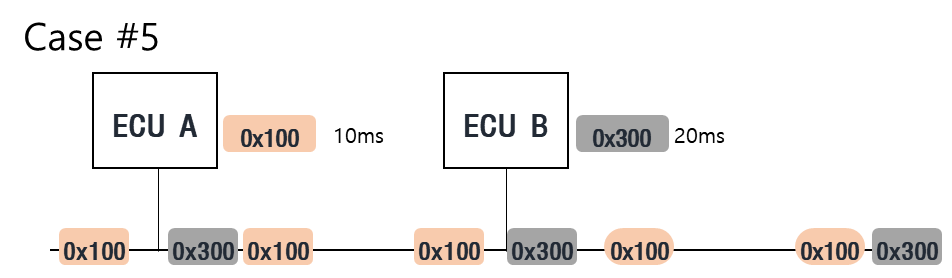

min_interval:  0.1603000000010013
max_interval:  9.837300000000937


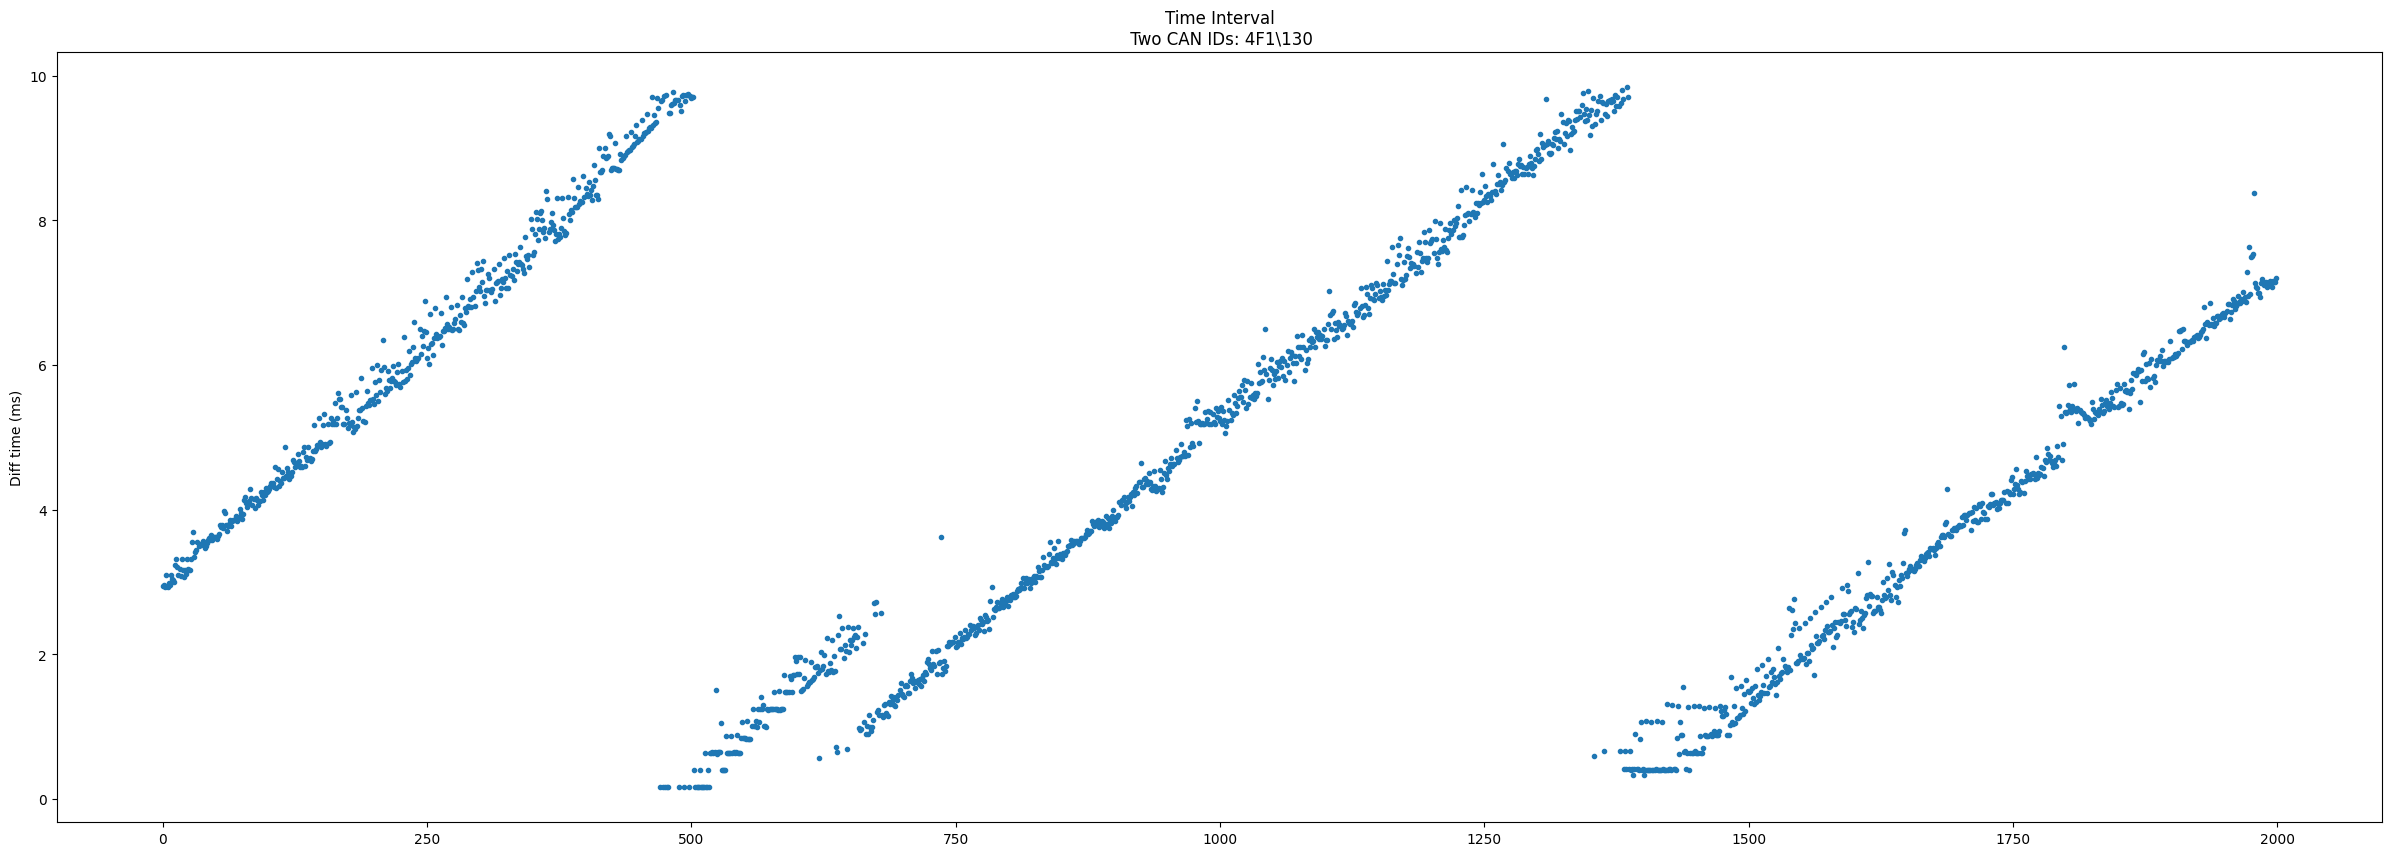

In [ ]:
CAN_ID_A = "4F1"
CAN_ID_B = "130"

find_Row_A = df.loc[df['Arbitration_ID']==CAN_ID_A]
find_Row_B = df.loc[df['Arbitration_ID']==CAN_ID_B]

interval_list = []
num = 0

if len(find_Row_A) > len(find_Row_B):

    for index, msg in find_Row_B.iterrows():
        time = msg['Timestamp']
        if len(find_Row_A.index[find_Row_A['Timestamp'] <= time]) != 0 :
            interval = time - find_Row_A.loc[find_Row_A.index[find_Row_A['Timestamp'] <= time][-1]]['Timestamp']
            interval_list.append(interval*1000)
            num += 1
            if num > 2000:
                break

else:
    for index, msg in find_Row_A.iterrows(): # 빠른 주기 메시지에 대한 시간 결과 확인
        time = msg['Timestamp']
        if len(find_Row_B.index[find_Row_B['Timestamp'] <= time]) != 0 :
            interval = time - find_Row_B.loc[find_Row_B.index[find_Row_B['Timestamp'] <= time][-1]]['Timestamp']
            interval_list.append(interval*1000)
            num += 1
            if num > 2000:
                break

interval_list = interval_list[1:]
min_interval = min(interval_list)
max_interval = max(interval_list)
print('min_interval: ',min_interval)
print('max_interval: ',max_interval)

plt.plot(interval_list, '.')
plt.ylabel("Diff time (ms)")
plt.title('Time Interval\n Two CAN IDs: ' + CAN_ID_A + '\\' + CAN_ID_B)
plt.show()

결과 테이블
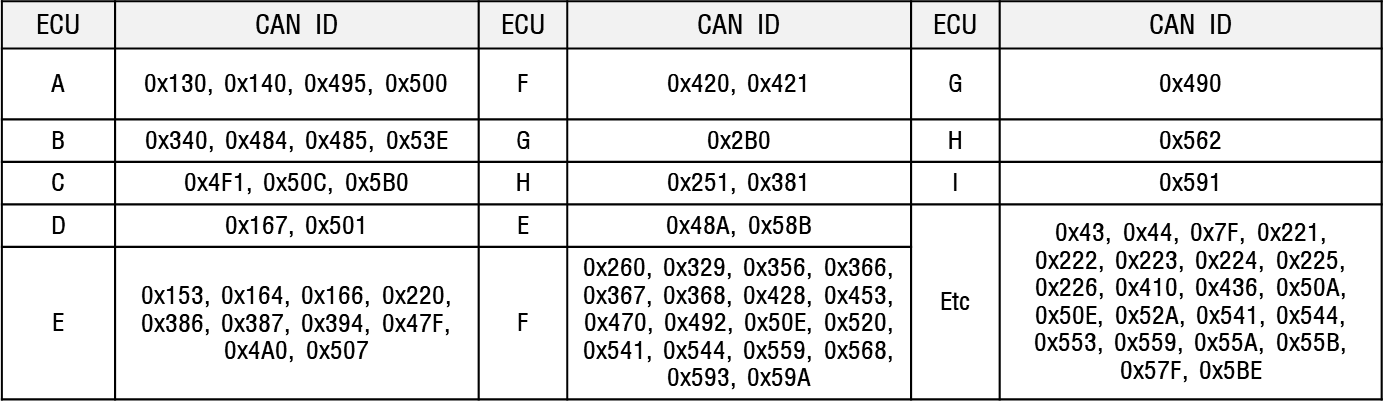


### Bit-flip Rate

Bit-flip Rates을 분석하는 경우에 Dataset의 사이즈가 커야함

(30분정도 수집된 데이터셋 로드)

Small Dataset으로 Bit-flip Rates을 분석하는 경우, 차량의 모든 기능이 activation되지 않기 때문에 Bit Flip이 발생하지 않음

In [ ]:
!pip install gdown
!gdown --id 197EhIqL83N8WkWTFrkeLbc46LHZZJsXx --output Car_Dataset_Large.csv
# https://drive.google.com/file/d/197EhIqL83N8WkWTFrkeLbc46LHZZJsXx/view?usp=sharing

df = pd.read_csv('./Car_Dataset_Large.csv')
# Timestamp, Arbitration_ID, DLC, Data


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=197EhIqL83N8WkWTFrkeLbc46LHZZJsXx
To: /content/Car_Dataset_Large.csv
100% 209M/209M [00:01<00:00, 203MB/s]


In [ ]:
def get_bit_flip_rates(df):
  dlc = df['DLC'].values[0] # 첫번째 행에 있는 dlc 값을 사용
  previous_data_bin = bitarray(bin(0)[2:].zfill(dlc*8)) # 000000000~0000000 <--- 0으로 초기화되어 있는 dlc*8 길이의 비트시퀀스
  bitflip_num_list = [0]*(dlc*8)
  num_msgs = 0

  for index, msg in df.iterrows():
    if msg['Arbitration_ID'] == CAN_ID:
      # print(index, msg['Arbitration_ID'],msg['Data'])
      # msg['Data'].replace(" ","")
      # int(msg['Data'].replace(" ",""),16)
      # bin(int(msg['Data'].replace(" ",""),16))
      # bin(int(msg['Data'].replace(" ",""),16))[2:].zfill(msg['DLC']*8)
      current_data_bin = bitarray(bin(int(msg['Data'].replace(" ",""),16))[2:].zfill(msg['DLC']*8))
      bitflip = previous_data_bin ^ current_data_bin
      num_msgs += 1
      previous_data_bin = current_data_bin

      for index in range(dlc*8):
        bitflip_num_list[index] += bitflip[index]

  for index in range(dlc*8):
    bitflip_num_list[index] /= num_msgs
  # print(bitflip_num_list)
  return bitflip_num_list


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 5.2 MB/s 


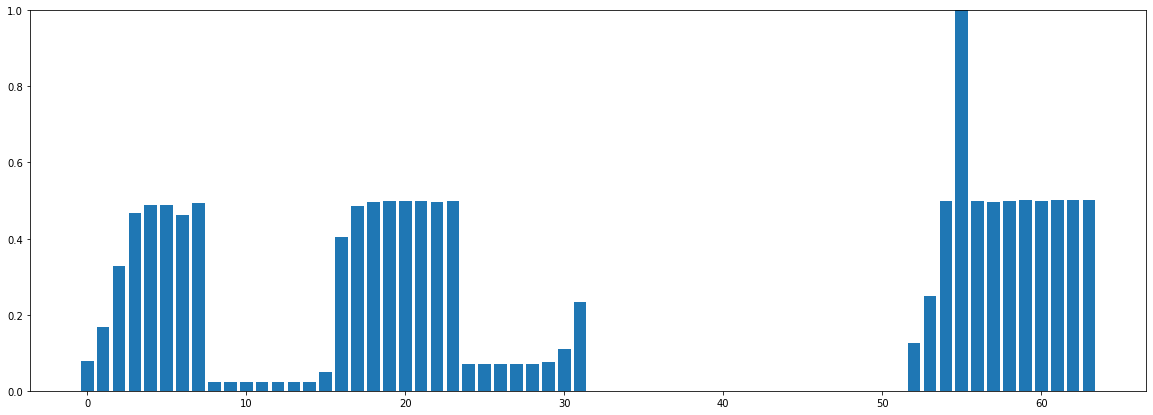

In [ ]:
!pip install bitarray
from bitarray import bitarray
import matplotlib.pyplot as plt

CAN_ID = '130'
dlc = 8
# print(df.loc[df['Arbitration_ID'] == CAN_ID])

bitflip_num_list = get_bit_flip_rates(df.loc[df['Arbitration_ID'] == CAN_ID])

plt.ylim([0,1])
plt.bar(range(dlc*8),bitflip_num_list)
plt.show()

### Bit Position Arrangement

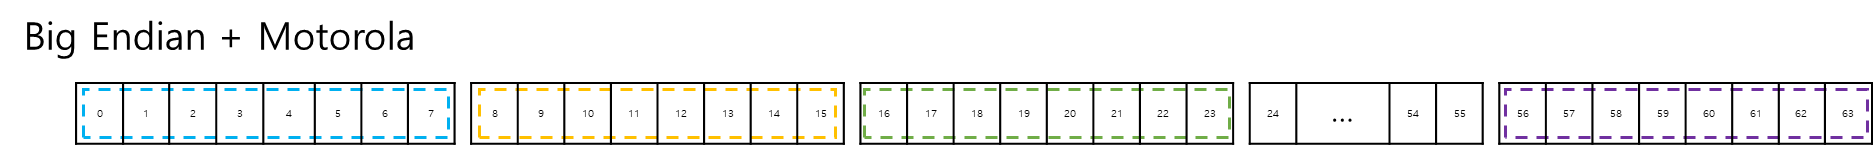

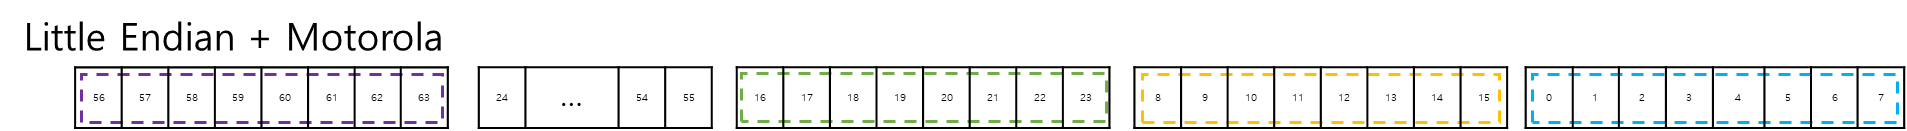

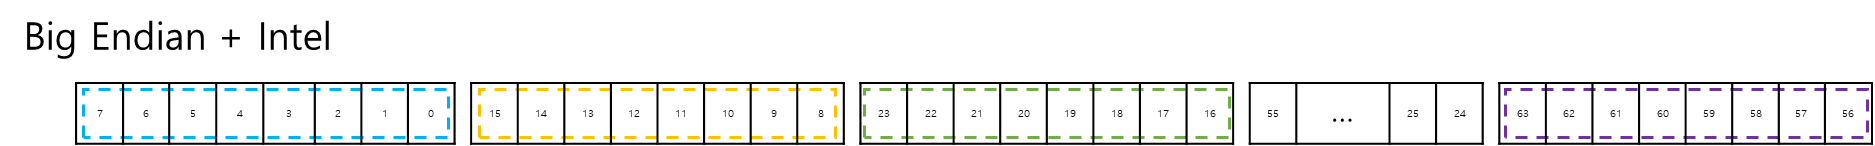

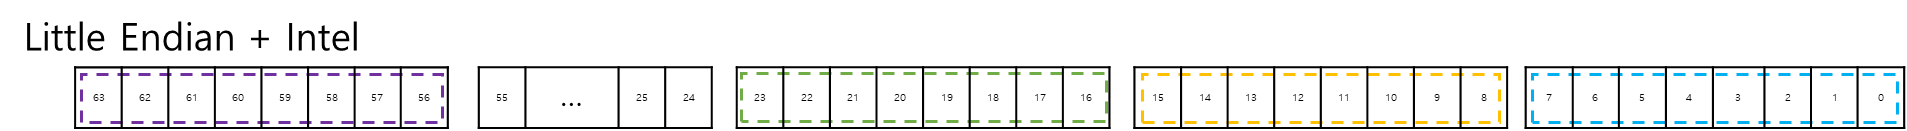

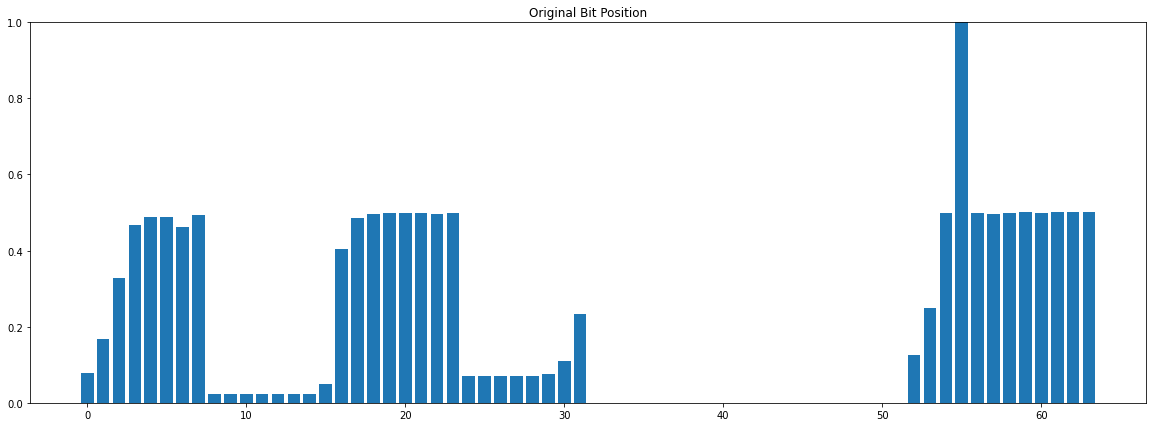

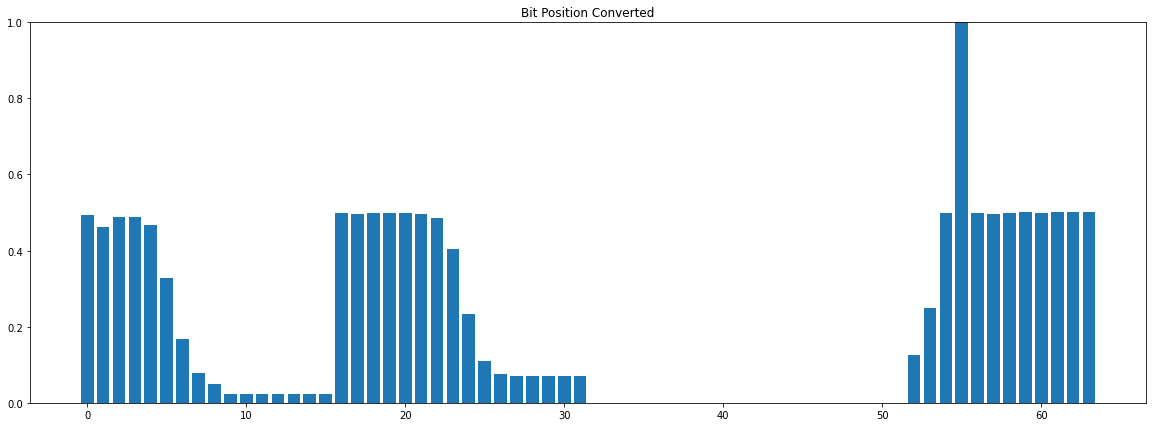

In [ ]:
plt.title('Original Bit Position')
plt.ylim([0,1])
plt.bar(range(dlc*8),bitflip_num_list)
plt.show()

for i in range(msg['DLC']):
  t = bitflip_num_list[8*i:8*(i+1)]
  bitflip_num_list[8*i:8*(i+1)] = t[::-1]

plt.title('Bit Position Converted')
plt.ylim([0,1])
plt.bar(range(dlc*8),bitflip_num_list)
plt.show()



### Bit-flip Rate Time Serise

## Draw a figure for a single bit

Bit-flip rate time serise

(3431, 64)


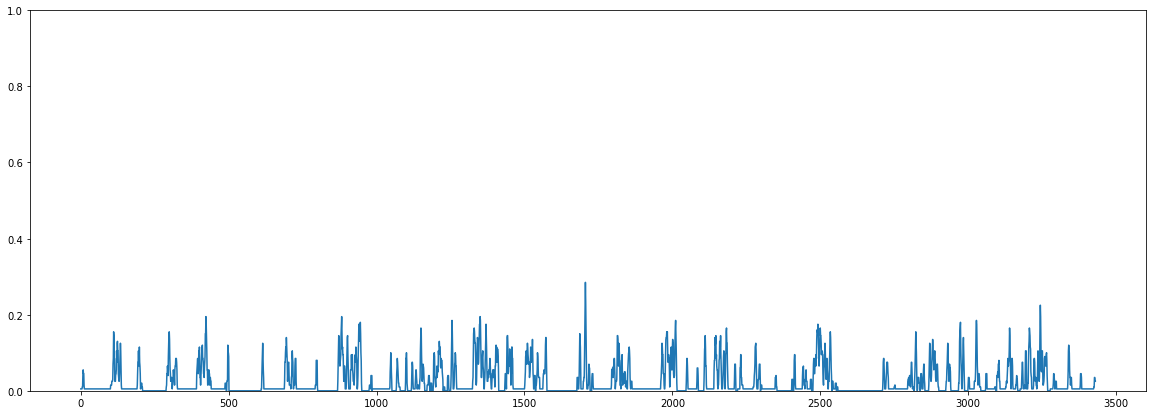

In [ ]:
import numpy as np

CAN_ID = '130'
dlc = 8
WINDOW_SIZE = 200
stride = 50
bit_flip_rate_time_serise = []

sub_df = df.loc[df['Arbitration_ID'] == CAN_ID]
for i in range(0, len(sub_df)-WINDOW_SIZE, stride ):
  # sub_df[i:i+WINDOW_SIZE]
  # print(i,i+WINDOW_SIZE, sub_df[i:i+WINDOW_SIZE])
  bitflip_num_list = get_bit_flip_rates( sub_df[i:i+WINDOW_SIZE] )
  bit_flip_rate_time_serise.append(bitflip_num_list)

bit_flip_rate_time_serise = np.array(bit_flip_rate_time_serise)
print(bit_flip_rate_time_serise.shape)

bit_position = 10
plt.plot(bit_flip_rate_time_serise[:,bit_position])
plt.ylim([0,1])
plt.show()


### For Multiple Bits

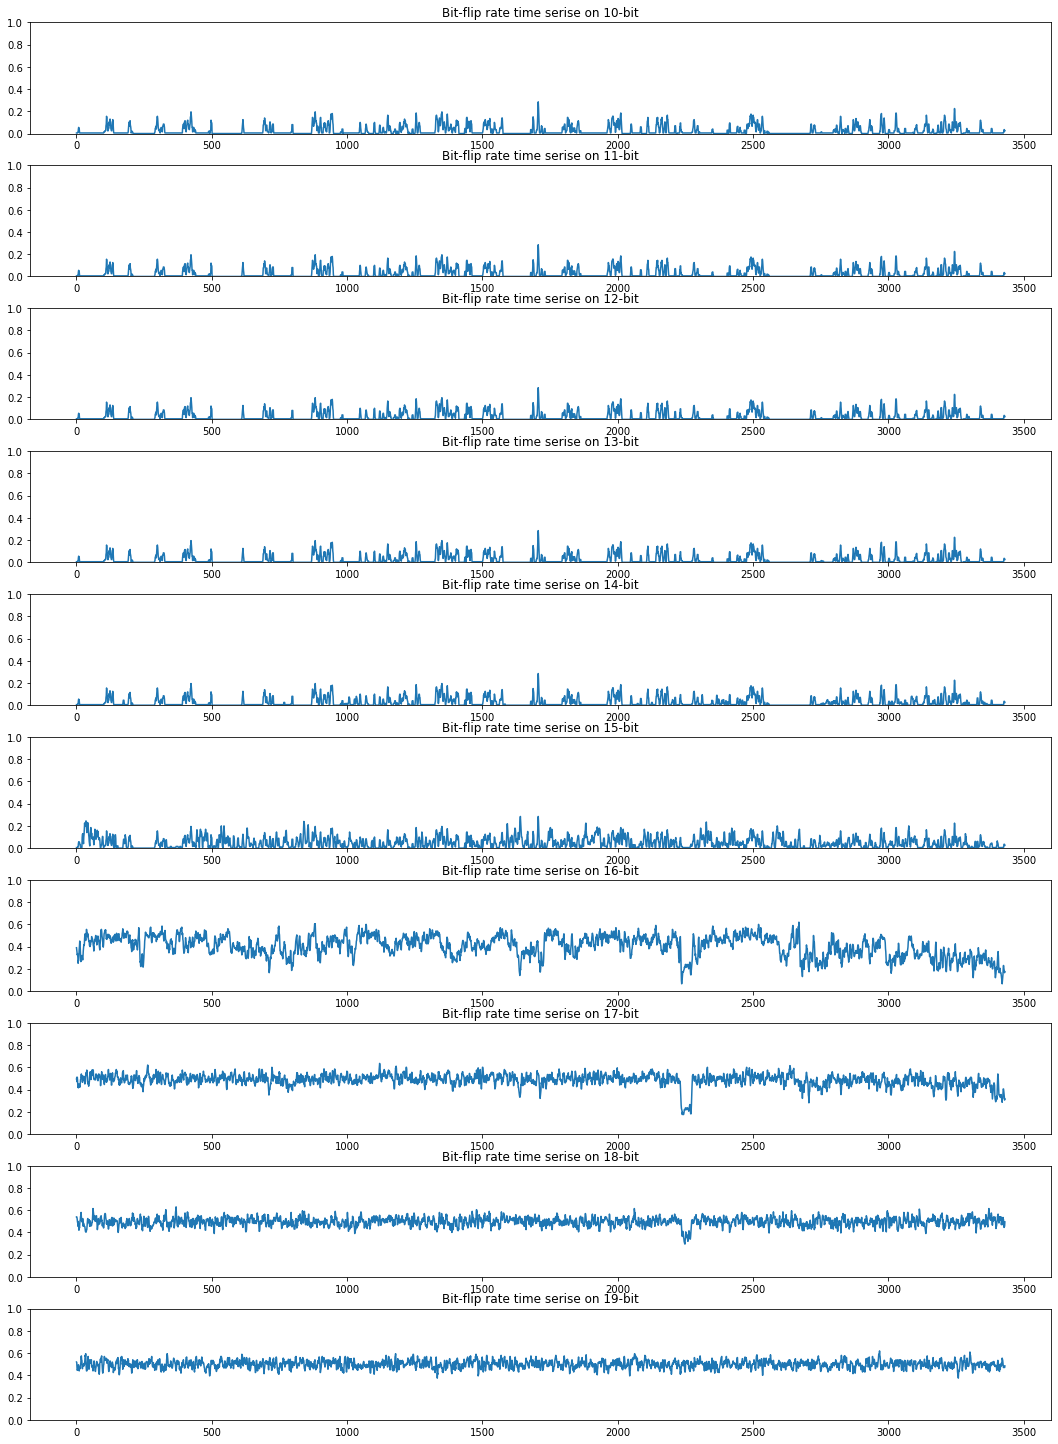

In [ ]:
plt.rcParams["figure.figsize"] = (15,20)

NUM_OF_FIGS = 10

fig, axs = plt.subplots(NUM_OF_FIGS)
fig.tight_layout()
for i in range(NUM_OF_FIGS):
  axs[i].plot(bit_flip_rate_time_serise[:,i+10])
  axs[i].set_ylim([0,1])
  axs[i].set_title('Bit-flip rate time serise on ' + str(i+10) +'-bit')

### Corr

[[ 1.          0.44776582  0.32851968 ...  0.04712717  0.00821454
  -0.01095599]
 [ 0.44776582  1.          0.71622516 ...  0.03880454  0.01883223
   0.01851426]
 [ 0.32851968  0.71622516  1.         ...  0.02155877 -0.0241925
   0.03485168]
 ...
 [ 0.04712717  0.03880454  0.02155877 ...  1.          0.04934125
   0.02197626]
 [ 0.00821454  0.01883223 -0.0241925  ...  0.04934125  1.
  -0.02570294]
 [-0.01095599  0.01851426  0.03485168 ...  0.02197626 -0.02570294
   1.        ]]


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


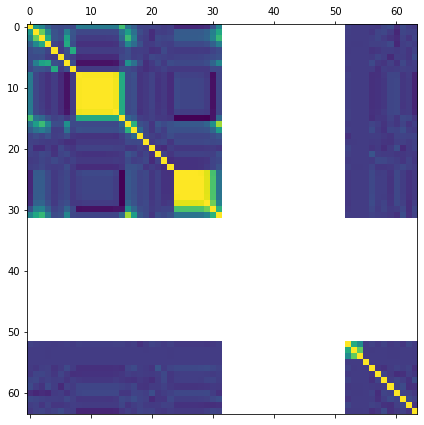

In [ ]:
# from matplotlib.pyplot import imshow
import numpy as np
import matplotlib.pyplot as plt

xcrr = np.corrcoef(np.transpose(bit_flip_rate_time_serise))
print(xcrr)
plt.rcParams["figure.figsize"] = (7,7)
plt.matshow(xcrr)
plt.show()


### Signal Type